In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.gridspec as gridspec

from tqdm import tqdm
tqdm.pandas()

In [3]:
def read_files(folder, add_file_column=False, **kwargs):
    def read_file(path, add_file_column=False, **kwargs):
        file = os.path.basename(path)
        try:
            df = pd.read_csv(path, low_memory=False, **kwargs)
        except pd.errors.EmptyDataError:
            print(f"{file} is empty")
            return pd.DataFrame()

        if add_file_column:
            df['file'] = file

        return df

    return pd.concat([read_file(path, add_file_column, **kwargs) for path in tqdm(glob.glob(os.path.join(folder, '*.csv')))], ignore_index=True)

In [5]:
df_titles_map = read_files('dataset/titles/map')
df_titles_si = read_files('dataset/titles/si')
df_promotions_unvalidated = pd.concat([read_files('dataset/promotions/unvalidated/edges')], ignore_index=True)
df_promotions_validated = pd.concat([read_files('dataset/promotions/validated/edges')], ignore_index=True)

100%|██████████| 48/48 [00:00<00:00, 480.23it/s]


In [6]:
# Recreate df_sector_counts
df_sector_counts = df_titles_map.groupby('sector')['title_generalized'].nunique().reset_index().rename(columns={'title_generalized': 'count'})
df_sector_counts['percentage'] = (df_sector_counts['count'] / df_sector_counts['count'].sum()) * 100

# Recreate df_sector_promotions
df_sector_promotions_unvalidated = df_promotions_unvalidated.groupby('sector').size().reset_index(name='count')
df_sector_promotions_unvalidated['percentage'] = (df_sector_promotions_unvalidated['count'] / df_sector_promotions_unvalidated['count'].sum()) * 100

df_sector_promotions_validated = df_promotions_validated.groupby('sector').size().reset_index(name='count')
df_sector_promotions_validated['percentage'] = (df_sector_promotions_validated['count'] / df_sector_promotions_validated['count'].sum()) * 100

# Recreate df_grouped (for world map)
df_grouped = df_promotions_unvalidated.groupby('country_binned').size().reset_index(name='count')
df_grouped['percentage'] = (df_grouped['count'] / df_grouped['count'].sum()) * 100

C:\Users\Shehryar\AppData\Local\Temp\ipykernel_39828\2159619807.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
C:\Users\Shehryar\AppData\Local\Temp\ipykernel_39828\2159619807.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
C:\Users\Shehryar\AppData\Local\Temp\ipykernel_39828\2159619807.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')


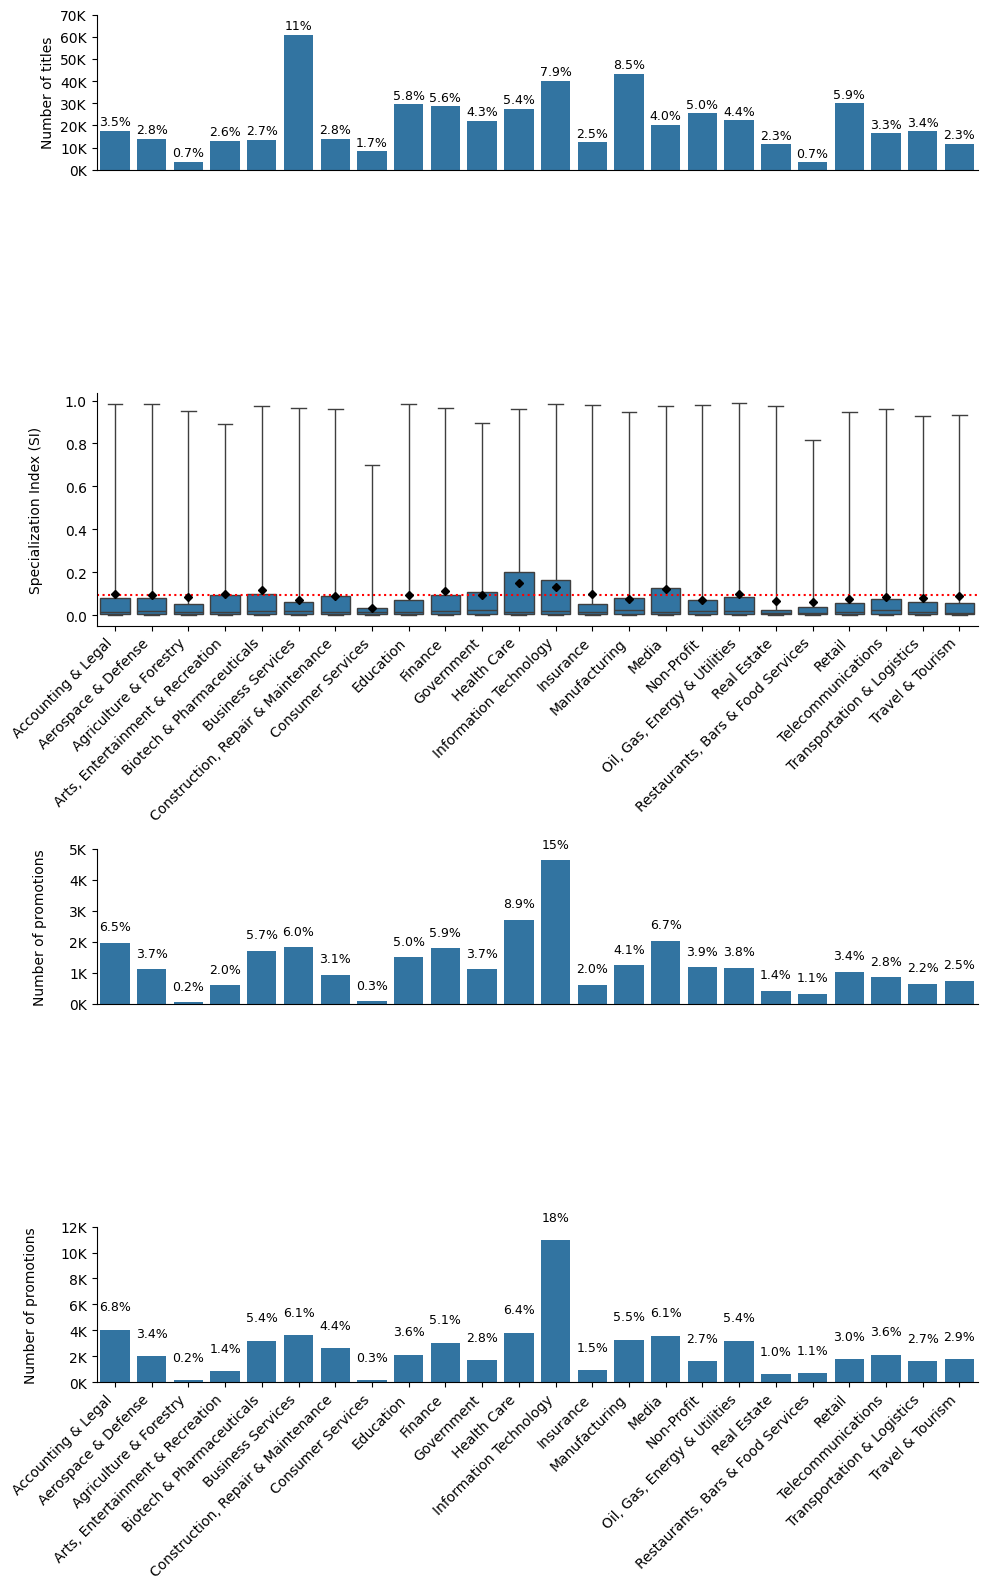

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(10, 16))
gs = gridspec.GridSpec(4, 1, height_ratios=[2, 3, 2, 2], figure=fig)

# Create axes for each subplot using gridspec
ax1 = fig.add_subplot(gs[0])  # Bar plot of unique titles per sector
ax2 = fig.add_subplot(gs[1])  # Boxplot of SI per sector
ax3 = fig.add_subplot(gs[2])  # Bar plot of promotions (unvalidated)
ax4 = fig.add_subplot(gs[3])  # Bar plot of promotions (validated)

# --- Plot 1: Bar plot of unique titles per sector ---
sns.barplot(data=df_sector_counts, x='sector', y='count', ax=ax1, color='tab:blue')
ax1.set_ylabel("Number of titles", fontsize=10)

# Add percentage labels on top of each bar
for index, row in enumerate(df_sector_counts.itertuples()):
    percentage_text = f"{int(row.percentage)}%" if row.percentage > 9 else f"{row.percentage:.1f}%"
    ax1.text(index, row.count + 2500, percentage_text, ha='center', fontsize=9)

# Format y-axis to show count in thousands (K format)
ax1.set_yticks(ax1.get_yticks())
ax1.set_yticklabels([f"{int(y/1e3)}K" for y in ax1.get_yticks()])

# Remove x-axis labels and ticks completely
ax1.set_xticklabels([])
ax1.set_xticks([])

sns.despine(ax=ax1)
ax1.set_xlabel("")

# --- Plot 2: Boxplot of Specialization Index (SI) per sector ---
sns.boxplot(
    data=df_titles_si, x='sector', y='SI', ax=ax2, showmeans=True,
    meanline=False, meanprops={'marker': 'D', 'markerfacecolor': 'black', 'markeredgecolor': 'black', 'markersize': 4},
    whis=[0, 100]
)

# Draw the horizontal mean line
overall_mean = df_titles_si['SI'].mean()
ax2.axhline(overall_mean, linestyle='dotted', color='red', linewidth=1.5)
ax2.set_ylabel("Specialization Index (SI)\n", fontsize=10)

# Rotate x-axis labels for readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_xlabel("")

sns.despine(ax=ax2)

# --- Plot 3: Bar plot of promotions (Validated) ---
sns.barplot(data=df_sector_promotions_validated, x='sector', y='count', ax=ax3, color='tab:blue')
ax3.set_ylabel("Number of promotions\n", fontsize=10)

# Add percentage labels on top of each bar
for index, row in enumerate(df_sector_promotions_validated.itertuples()):
    percentage_text = f"{int(row.percentage)}%" if row.percentage > 9 else f"{row.percentage:.1f}%"
    ax3.text(index, row.count + 400, percentage_text, ha='center', fontsize=9)

# Format y-axis to show count in thousands (K format)
ax3.set_yticks(ax3.get_yticks())
ax3.set_yticklabels([f"{int(y/1e3)}K" for y in ax3.get_yticks()])

# Remove x-axis labels and ticks completely
ax3.set_xticklabels([])
ax3.set_xticks([])

sns.despine(ax=ax3)
ax3.set_xlabel("")

# --- Plot 4: Bar plot of promotions (Unvalidated) ---
sns.barplot(data=df_sector_promotions_unvalidated, x='sector', y='count', ax=ax4, color='tab:blue')
ax4.set_ylabel("Number of promotions\n", fontsize=10)

# Add percentage labels on top of each bar
for index, row in enumerate(df_sector_promotions_unvalidated.itertuples()):
    percentage_text = f"{int(row.percentage)}%" if row.percentage > 9 else f"{row.percentage:.1f}%"
    ax4.text(index, row.count + 1500, percentage_text, ha='center', fontsize=9)

# Format y-axis to show count in thousands (K format)
ax4.set_yticks(ax4.get_yticks())
ax4.set_yticklabels([f"{int(y/1e3)}K" for y in ax4.get_yticks()])

# Rotate x-axis labels for readability
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

# Rotate x-axis labels for readability
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

sns.despine(ax=ax4)
ax4.set_xlabel("")

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

# Save in high resolution
fig.savefig('figure_4.png', dpi=600)